Text(0.5, 1.0, 'Bootstrap Precision')

<Figure size 640x480 with 0 Axes>

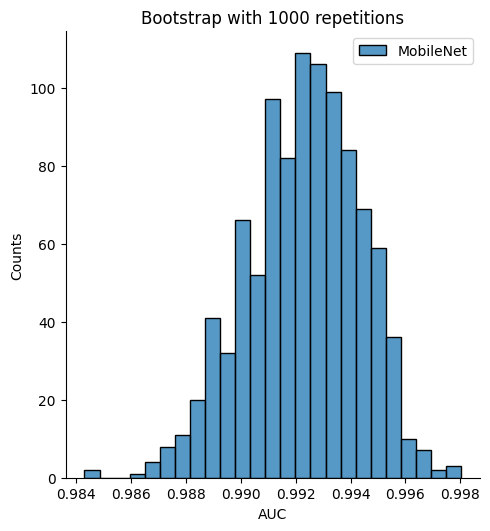

<Figure size 640x480 with 0 Axes>

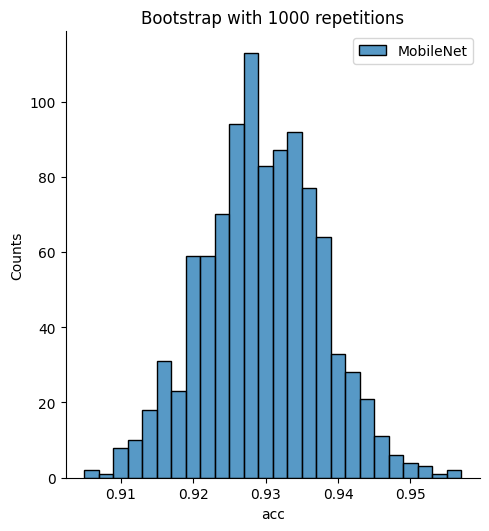

<Figure size 640x480 with 0 Axes>

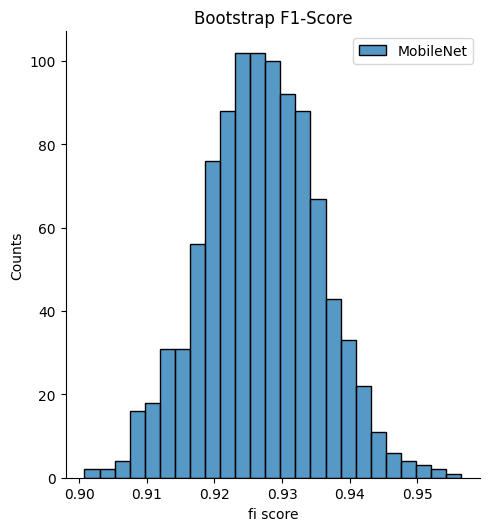

<Figure size 640x480 with 0 Axes>

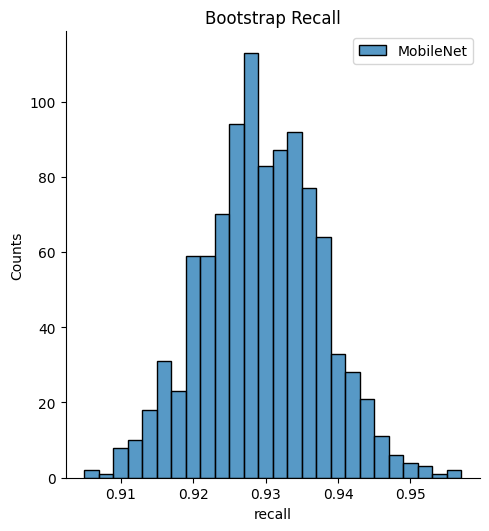

<Figure size 640x480 with 0 Axes>

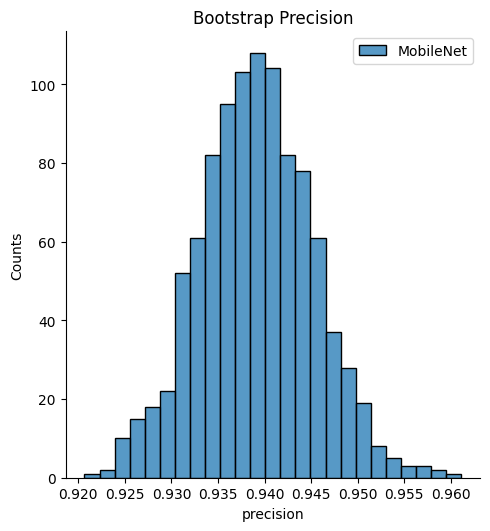

In [41]:
import seaborn as sns
from pathlib import Path
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from tensorflow.keras.utils import Sequence, to_categorical
from sklearn.metrics import (
    classification_report,
    roc_auc_score,
    accuracy_score,
    confusion_matrix,
    precision_score,
    recall_score, f1_score
)


# acesso ao modelo a ser verificado
url = "/src/pesquisa_jovem_cientista/pesquisa_jovem_cientista/MobileNetV2/csv/model_mobilenet_8_noAUG_under.csv"
df_pred = pd.read_csv(url)
test_data_path = os.path.abspath("/data/ZhangLabData/CellData/OCT/test")
filelist_test = []

# conjunto de teste
for root, dirs, files in os.walk(test_data_path):
        for file in files:
            # append the file name to the list
            filelist_test.append(os.path.join(root, file))
diseases = [i.split("/")[-2] for i in filelist_test]
patient = [i.split("-")[-2] for i in filelist_test]
image_nb = [i.split("-")[-1] for i in filelist_test]

df_test = pd.DataFrame(
        data={
            "label": diseases,
            "patient": patient,
            "image_nb": image_nb,
            "file_path": filelist_test,
        }
    )

# calculate metrics using bootstrap
used_labels = {"NORMAL": 0, "DRUSEN": 1, "DME": 2, "CNV": 3}
rep = 1000
thr=0.95
N = len(df_pred.index)
n = N

aucs_1 = np.array([])
accuracies = np.array([])
f1_scores = np.array([])
recalls = np.array([])
precisions = np.array([])

for i in range(rep):
    
    df_pred = df_pred[["NORMAL","DRUSEN","DME","CNV"]]
    df_aux = df_pred.sample(n=n,replace=True)
    y_pred = df_aux.idxmax(axis=1)
    y_pred_proba = df_aux[['NORMAL','DRUSEN', 'DME', 'CNV']].values
    y_true = df_test['label'].loc[list(df_aux.index)].values
    y_cat = to_categorical([used_labels[i] for i in y_true], num_classes=len(used_labels.keys()))    

    aucs_1 = np.append(aucs_1,roc_auc_score(y_cat, y_pred_proba, multi_class='ovr'))
    accuracies = np.append(accuracies,accuracy_score(y_true, y_pred))
    f1_scores = np.append(f1_scores,f1_score(y_true, y_pred, average='weighted'))
    recalls = np.append(recalls,recall_score(y_true, y_pred, average='weighted'))
    precisions = np.append(precisions,precision_score(y_true, y_pred, average='weighted'))
    
plt.figure()
sns.displot(aucs_1)     
plt.legend(['MobileNet'])
plt.ylabel('Counts')
plt.xlabel('AUC')
plt.title('Bootstrap with {} repetitions'.format(rep))

plt.figure()
sns.displot(accuracies)     
plt.legend(['MobileNet'])
plt.ylabel('Counts')
plt.xlabel('acc')
plt.title('Bootstrap with {} repetitions'.format(rep))

plt.figure()
sns.displot(f1_scores)
plt.legend(['MobileNet'])
plt.ylabel('Counts')
plt.xlabel('fi score')
plt.title('Bootstrap F1-Score')

plt.figure()
sns.displot(recalls)
plt.legend(['MobileNet'])
plt.ylabel('Counts')
plt.xlabel('recall')
plt.title('Bootstrap Recall')

plt.figure()
sns.displot(precisions)
plt.legend(['MobileNet'])
plt.ylabel('Counts')
plt.xlabel('precision')
plt.title('Bootstrap Precision')

In [42]:
'cálculo do intervalo de confiança para 95%'

# AUC
alpha = 0.05
lower = np.percentile(aucs_1, 100 * alpha / 2)
upper = np.percentile(aucs_1, 100 * (1 - alpha / 2))

# Acurácia
alpha = 0.05
lower_acc = np.percentile(accuracies, 100 * alpha / 2)
upper_acc = np.percentile(accuracies, 100 * (1 - alpha / 2))

# f1 score
alpha = 0.05
lower_f1 = np.percentile(f1_scores, 100 * alpha / 2)
upper_f1 = np.percentile(f1_scores, 100 * (1 - alpha / 2))

# recall
alpha = 0.05
lower_rc = np.percentile(recalls, 100 * alpha / 2)
upper_rc = np.percentile(recalls, 100 * (1 - alpha / 2))

# precision
alpha = 0.05
lower_pr = np.percentile(precisions, 100 * alpha / 2)
upper_pr = np.percentile(precisions, 100 * (1 - alpha / 2))

caminho_arquivo = Path("/src/pesquisa_jovem_cientista/pesquisa_jovem_cientista/MobileNetV2/results/metrics_mobileV2.txt")

with open(caminho_arquivo, 'a') as arquivo:
    arquivo.write(url.split("/")[-1].split('.')[0]+"\n")
    arquivo.write(f"Intervalo de confiança de 95%       (AUC): [{lower*100:.2f}%, {upper*100:.2f}%]\n")
    arquivo.write(f"Intervalo de confiança de 95%  (Acurácia): [{lower_acc*100:.2f}%, {upper_acc*100:.2f}%]\n")
    arquivo.write(f"Intervalo de confiança de 95%  (f1-score): [{lower_f1*100:.2f}%, {upper_f1*100:.2f}%]\n")
    arquivo.write(f"Intervalo de confiança de 95%    (recall): [{lower_rc*100:.2f}%, {upper_rc*100:.2f}%]\n")
    arquivo.write(f"Intervalo de confiança de 95% (precision): [{lower_pr*100:.2f}%, {upper_pr*100:.2f}%]\n")
    arquivo.write("\n")

print("resultados adicionados no arquivo!")

resultados adicionados no arquivo!
